# AI/ML In Practice

The following lesson is follow along lesson, where we will show you how machine learning models are built and used in practice. 

You won't need to write any code, but will see how existing pre-written packages of code allow us to easily train our own ML models, without having to re-engineer about what goes on under the hood. 


Of course, when building production software, a deep understanding of underlying technologies is essential. There are issues with AI models too, like bias and hallucination, that must be understood better before they are used in practice. 

This lesson is meant for beginner developers, who want to start playing with these models on their own.

## The Power of Abstraction

As a regular non-AI/ML programmer, you can still use these technologies in your code. This is made possible through the power of abstraction. 
Abstraction is one of the cornerstones of computer science. It refers to developing code that can be used by other developers, but without needing to be intricately understood by other developers. 

It allows us to build on top of existing technologies without spending too many resources building everything from scratch.
Python developers can use built-in, or open-source *libraries*, to accomplish many general purpose programming tasks, that may in reality be very complex! One of these tasks is training a Machine Learning model.



```{image} ./images/Abstraction.png
:class: bg-primary mb-1
:height: 300px
:align: center
```

Image Credit: [ScienceDirect.com](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.sciencedirect.com%2Fscience%2Farticle%2Fpii%2FS0927025618302349&psig=AOvVaw255dgEq3TCHeFFquyrrbdz&ust=1713891170627000&source=images&cd=vfe&opi=89978449&ved=0CAQQjB1qFwoTCPCA1b2l1oUDFQAAAAAdAAAAABAE)

## Machine Learning Libraries in Practice

To use an installed package, we can simply import it into our project. Of course, if the package is not installed, we can install it using pip (python's package installation system).

One of the most common and easy to use Python packages for machine learning is called scikit-learn. First, lets install scikit-learn.

Another commonly used library for data analysis is called Pandas. We shall install pandas as well.

In [4]:
!pip install scikit-learn pandas

In [5]:
import pandas 
import numpy 
print("Packages successfully installed!")


Packages successfully installed!


### Linear Regression 
Lets explore one of the simplest and most useful machine learning methods, linear regression. Simply put, this method takes some numerical data, and tried to find a line of best fit for that data. It's best explained with an example! 

Lets image a case where a country-wide shortage of oranges has been announced. After this announcement, our team of data scientists has recorded the price of oranges every two days, for the next 10 days. This is what our data looks like: 

```{image} ./images/LinearRegression.png
:class: bg-primary mb-1
:height: 500px
:align: center
```

Image Credit: [Spiceworks](https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/)

In [6]:
data = {
    "Days after orange shortage announced": [2,4,6,8,10],
    "Price of oranges ($)":[3,4,5,6,7],
}

# Note: We're using the pandas dataframe to store our data!
df = pandas.DataFrame.from_dict(data)
display(df)

,Days after orange shortage announced,Price of oranges ($)
0,2,3
1,4,4
2,6,5
3,8,6
4,10,7


Now, lets plot our data on a graph, to understand how it looks, and get insights into the trend of this graph. 

To accomplish this task, we will use another python library called matplot.

In [7]:
!pip install matplotlib

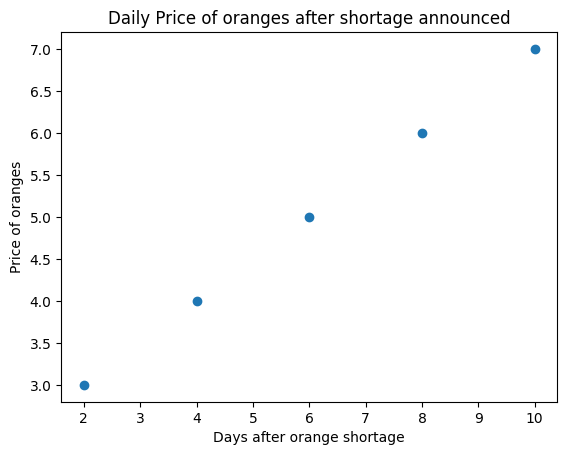

In [8]:
from matplotlib import pyplot


X_axis_data = df["Days after orange shortage announced"]
Y_axis_data = df["Price of oranges ($)"]
pyplot.scatter( X_axis_data, Y_axis_data )

# Now, lets set some labels for our graph 
pyplot.xlabel("Days after orange shortage")
pyplot.ylabel("Price of oranges")
pyplot.title("Daily Price of oranges after shortage announced")

pyplot.show()

Nice! It looks like our data follows a line, or has a 'linear trend'. This makes it perfect for linear regression!

We'll use scikit-learns `model` package to abstractly use Linear Regression, without needing to implement any details!

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# this code will yield an error
try: 
    reg = LinearRegression().fit(X_axis_data, Y_axis_data)
    print("Success!")
except Exception as e: 
    print("Found an error!")
    print(e)



Found an error!
Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.


Looks like our LinearRegression() function expects data in a different format. Currently, we pass in our X_axis_data as a list, but our function expects a 2-D list. Lets fix this!

In [11]:
try: 
    X_axis_data = [[X] for X in X_axis_data] # Using a list-comprehension technique to re-format our data!
    reg = LinearRegression().fit(X_axis_data, Y_axis_data)
    print("Success!")
except Exception as e: 
    print("Found an error!")
    print(e)

Success!


Lets test our model now! Once again, this is the data that we learned from: 

In [ ]:
display(df)

What if we wanted to know the price of oranges on day 3, or day 11? Our model can give us an estimate for this price. 

In [ ]:
print("The price of oranges on day 3 is" ,reg.predict([[3]]))
print("The price of oranges on day 10 is" ,reg.predict([[11]]))


You can see that the price on day 3 lies exactly between the price of the oranges on day 2 and the price on day 4, and the price on day 11 is a 0.5 increase over the price on day 10. 
From the data the model has made the following inference: every two days the price increases by one dollar, so every day the price increases by half a dollar. 

Lets plot the line the model learned, along with our original data.  

In [ ]:

# Getting some responses from the model on unseen data
dummy_data = [[day] for day in range(12)]
model_outputs = reg.predict(dummy_data)

# Plotting both the original data and the learned line 
pyplot.scatter(X_axis_data, Y_axis_data, label="Original Data")
pyplot.plot(dummy_data, model_outputs, color="red", label="Linear Regression Line")

# Labelling our graph
pyplot.xlabel("Days after orange shortage")
pyplot.ylabel("Price of oranges")
pyplot.title("Daily Price of oranges after shortage announced")
pyplot.legend()
pyplot.show()


### Sentiment Analysis 

Another easy-to-use Machine Learning application is called Sentiment Analysis, which aims to score how negative or positive a piece of text is. 

To explore sentiment shall use an extremely powerful library called nltk, which abstracts away almost all of the complexity of using a text-based machine learning model. We will make use of a pre-trained model, which has already learned how to determine the sentiment of a piece of text 

As before, lets install the library!

In [ ]:
!pip install nltk

In [ ]:
import nltk 
nltk.download('all')

```{image} ./images/SentimentAnalysis.png
:class: bg-primary mb-1
:height: 200px
:align: center
```
Image Credit: [Express Analytics](https://www.expressanalytics.com/blog/social-media-sentiment-analysis/)

We shall use the sentiment package from NLTK, to get a pre-trained model called vader. 

This model can take as input as piece of text, and outputs a score from 0-1 across 3 categories, positive, negative or neutral. For each category, a score closer to 1 indicates intense senitment for that category. 

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    print(f'''
    Determined the following scores for text '{text}':
        -Positive Sentiment: {sentiment_scores['pos']}
        -Negative Sentiment: {sentiment_scores['neg']}
        -Neutral Sentiment:  {sentiment_scores['neu']}
    ''')



get_sentiment('I love you!')
get_sentiment('I hate you!')




## Conclusion

We hope you enjoyed learning about how existing libraries enable regular developers to use ML techniques in our code! 
Linear regression and sentiment analysis are only two of many abstractions available through libraries like ntlk, scikit-learn, transformers, pytorch and keras!